# Data Exploration and Findings using Prosper Loan Data
## by Ziming Chen

## Preliminary Wrangling

> The dataset clearly explains the financial information of borrowers, lenders, investors and related fees and dates. There are 81 columns in the dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# import the dataset as df
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
# Since Credit Grade has so many null values, we should drop the column
df = df.drop('CreditGrade', axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 80 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha)                  84853 non-null object
ProsperScore          

### What is the structure of your dataset?

> There are three main aspects of the data:
1. Account information: ListingKey,ListingNumber,LoanNumber, LoanOriginalAmount and etc
2. Personal information: Occupation, EmploymentStatus, IncomeRange, IncomeVerifiable and etc
3. Monetary information: BorrowerRate, LP_InterestandFees, LP_NetPrincipalLoss, EstimatedReturn and etc

### What is/are the main feature(s) of interest in your dataset?

> I will try to answer these questions in the following project:
1. The relation of Borrower's state and Borrower's interest rate
2. The most popular loan term duration among people.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I would love to use the date, money, and personal information such as employment status to develop my project and tesifty my hypothesis

## Univariate Exploration


#### 1. What is the relationship between the borrower's state and brrower's interest rate 

In [7]:
# slicing the dataset and drop the null entries in the sliced dataset
state_interest = df[['BorrowerRate','BorrowerState']]
state_interest.dropna(inplace = True)

C:\Users\Jayden\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# understand the sliced data
state_interest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108422 entries, 0 to 113936
Data columns (total 2 columns):
BorrowerRate     108422 non-null float64
BorrowerState    108422 non-null object
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [9]:
# find out the average interest rate each state and sort it from the largest to smallest
mean_state_interest = state_interest.groupby('BorrowerState')['BorrowerRate'].mean()
mean_state_interest = mean_state_interest.sort_values(ascending = False)

Text(0.5, 1.0, 'AVG Interest Rate in State')

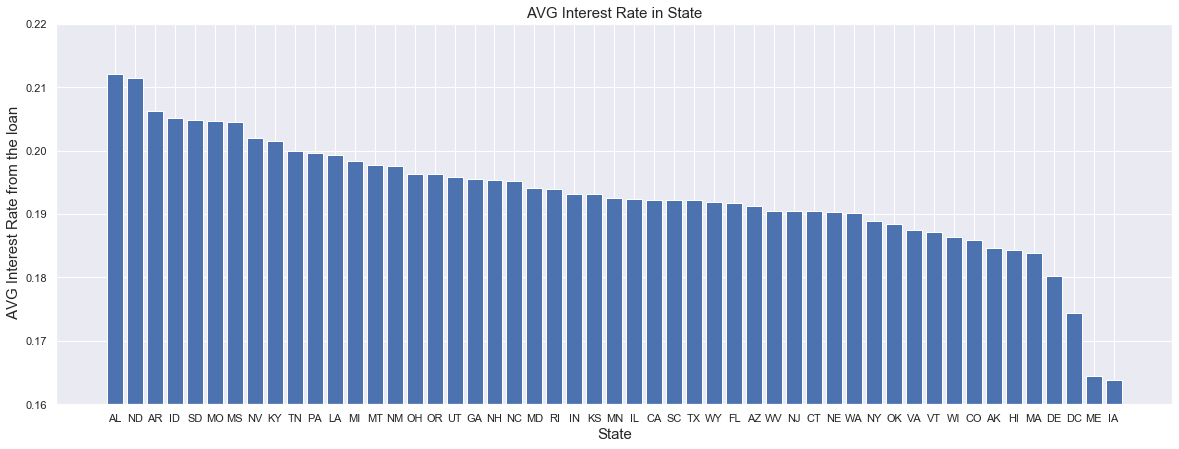

In [10]:
# plot the bar chart
sb.set(style='darkgrid')
ax, fig = plt.subplots(figsize = (20,7))
plt.bar(mean_state_interest.index, mean_state_interest)
plt.ylim(0.16,0.22)
plt.xlabel('State',size = 15)
plt.ylabel(' AVG Interest Rate from the loan',size = 15)
plt.title('AVG Interest Rate in State',size = 15)

#### Observation: As shown in the graph, the state that has highest average interest rate is AL and IA has the lowest average interest rate

#### 2. Find out which duration people prefer the most

In [11]:
df['ListingNumber'].nunique()

113066

In [12]:
# insert the data and observe if there is any null value
duration_id = df[['Term','ListingNumber']]
duration_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 2 columns):
Term             113937 non-null int64
ListingNumber    113937 non-null int64
dtypes: int64(2)
memory usage: 1.7 MB


In [13]:
# group the data by 12 months, 36 months and 60 months
term_groupby = duration_id.groupby('Term')['ListingNumber'].count()
term_groupby.values

array([ 1614, 87778, 24545], dtype=int64)

Text(0.5, 1.0, 'What loan terms do people favor the most?')

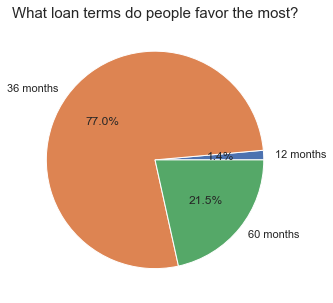

In [14]:
# number of loans issued based on duration
# pie chart
plt.figure(figsize = [10,5])
labels = ['12 months','36 months','60 months']
size = term_groupby.values
plt.pie(size,labels = labels,autopct='%1.1f%%')
plt.grid()
plt.title('What loan terms do people favor the most?',size = 15)

#### Observation: It seems like  most of people would choose a loan that ends in 36 months.

#### 3. Histogram of ProsperScore
 

C:\Users\Jayden\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Jayden\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'ProsperScore Distribution')

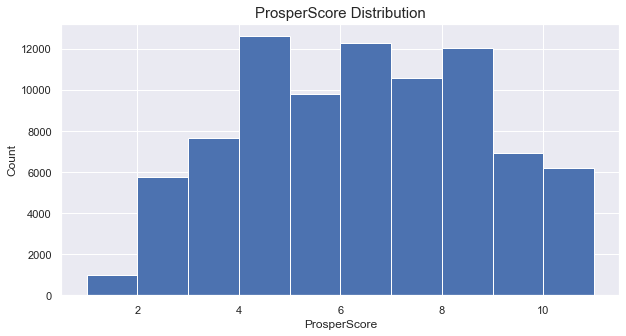

In [15]:
plt.figure(figsize = [10,5])
plt.hist(data = df,x = 'ProsperScore')
plt.xlabel('ProsperScore',size = 12)
plt.ylabel('Count',size = 12)
plt.title('ProsperScore Distribution',size = 15)


#### 4.  The distribution of Prosper Rating

Text(0.5, 1.0, 'Prosper Rating Distribution')

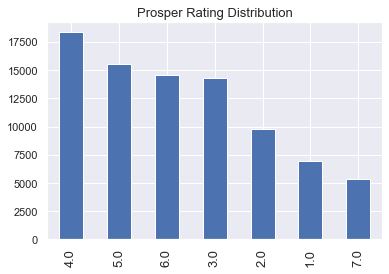

In [16]:
df['ProsperRating (numeric)'].value_counts().plot(kind='bar')
plt.xticks(size=13)
plt.title('Prosper Rating Distribution',size = 13)

#### The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009. It turns out that most people belongs to 4 Prosper Rating.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of average interest rate in each state is from 0. 16 to 0.22. IA and ME are the two states have the lowest interest rate which are lower than 0.17. Even though the number is low, there is no unusual point and no need to perform any transformations.

> Most people prefer to have the loan for 36 months. I suggest this might be related to the interest rate because 12 months may have a higher interest rate. Since 60 months might be too long for the borrower to pay back, I suggest it is reasonable that 36 months is the most popular one.

> Given the prosper score from 1 to 10,most of people have the score from 4 to 9.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I dropped the null value and group the data based on one variable. By doing this, I can know how the other variable changes based on the grouped variable. Speficially, I use bar chart and pie chart to illustrate the graphs.

## Bivariate Exploration

### 1. How can employement status affect the loan amount?

In [17]:
# insert the data and check for null value
employ_loan = df[['EmploymentStatus','LoanOriginalAmount']]
employ_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 2 columns):
EmploymentStatus      111682 non-null object
LoanOriginalAmount    113937 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [18]:
# drop null value
employ_loan = employ_loan.dropna()
employ_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111682 entries, 0 to 113936
Data columns (total 2 columns):
EmploymentStatus      111682 non-null object
LoanOriginalAmount    111682 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.6+ MB


In [19]:
# see the unique value of the dataset
print(employ_loan.EmploymentStatus.unique())
print(employ_loan.LoanOriginalAmount.unique())

['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other'
 'Not employed' 'Part-time' 'Retired']
[ 9425 10000  3001 ... 17669 19432  4292]


Text(0.5, 1.0, 'How can employment status affect loan amount?')

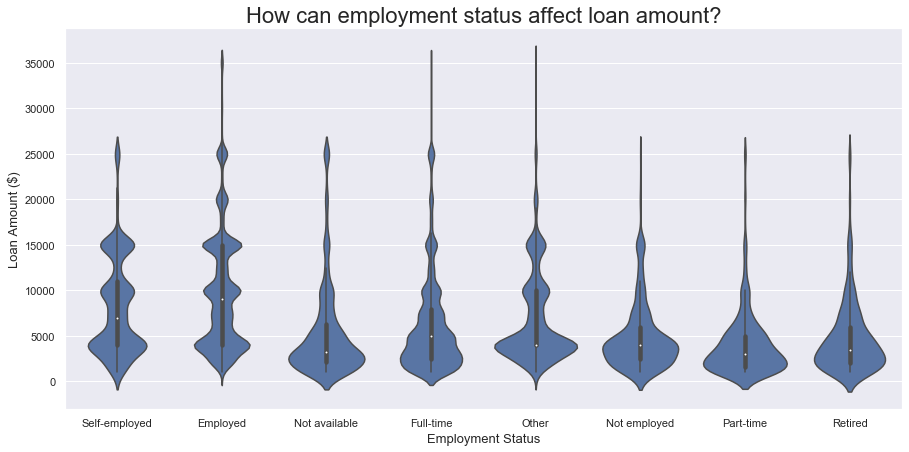

In [20]:
# violin plot
plt.figure(figsize = (15,7))
color = sb.color_palette()[0]
sb.violinplot(data = employ_loan,x = 'EmploymentStatus', y = 'LoanOriginalAmount',color=color)
plt.xlabel('Employment Status',size = 13)
plt.ylabel('Loan Amount ($)',size = 13)
plt.title('How can employment status affect loan amount?',size = 22)

#### Observation: As I predicted, employed people should have the higest loan amount on average. 

#### 2.  The relationship between house owner and salary range

In [21]:
# explore the dataset
house_income = df[['IsBorrowerHomeowner','IncomeRange']]
house_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 2 columns):
IsBorrowerHomeowner    113937 non-null bool
IncomeRange            113937 non-null object
dtypes: bool(1), object(1)
memory usage: 1001.5+ KB


In [22]:
# check unique value
print(house_income.IncomeRange.unique())
print(house_income.IsBorrowerHomeowner.unique())

['$25,000-49,999' '$50,000-74,999' 'Not displayed' '$100,000+'
 '$75,000-99,999' '$1-24,999' 'Not employed' '$0']
[ True False]


In [23]:
pivot = house_income.groupby(['IncomeRange','IsBorrowerHomeowner']).size()
pivot = pivot.reset_index(name='count')

pivot.fillna(value=np.nan, inplace=True)
pivot.pivot(index = 'IncomeRange',columns='IsBorrowerHomeowner',values = 'count')

IsBorrowerHomeowner,False,True
IncomeRange,,
$0,347,274
"$1-24,999",5751,1523
"$100,000+",4700,12637
"$25,000-49,999",19985,12207
"$50,000-74,999",13929,17121
"$75,000-99,999",6025,10891
Not displayed,5122,2619
Not employed,600,206


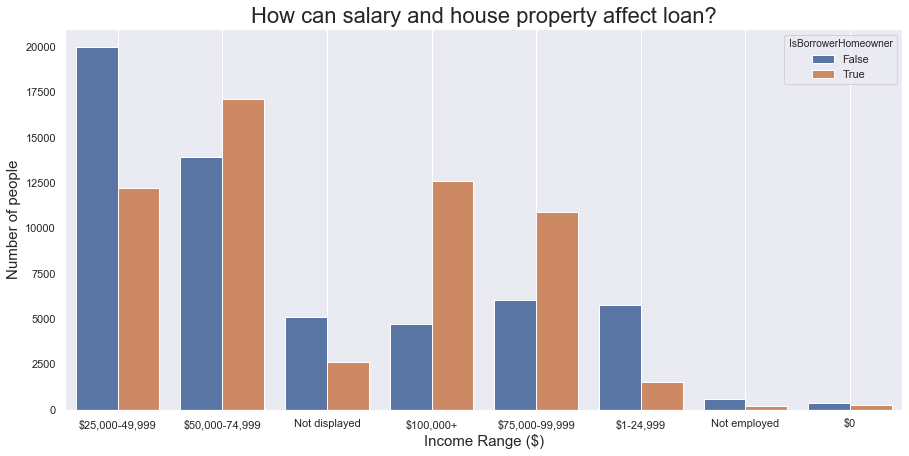

In [24]:
plt.figure(figsize = (15,7))
sb.countplot(data = house_income, x ='IncomeRange',hue = 'IsBorrowerHomeowner')
plt.xlabel('Income Range ($)',size = 15)
plt.ylabel('Number of people',size = 15)
plt.title('How can salary and house property affect loan?',size = 22)
plt.grid()

#### Observation: More salary and having house will tend to have more loans. 

#### 3. pairwise correlations present between features in the data. 

In [25]:
numeric_vars = ['BorrowerAPR','BorrowerRate','LoanOriginalAmount','MonthlyLoanPayment','EstimatedReturn','LP_CustomerPayments']
cate_vars = ['ProsperScore','IsBorrowerHomeowner','EmploymentStatus']

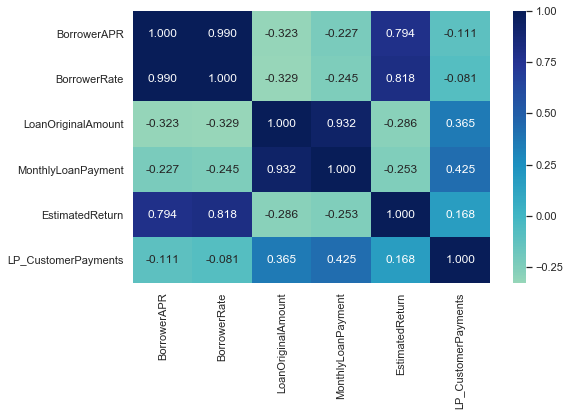

In [26]:
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', center = 0,cmap='YlGnBu')
plt.show()

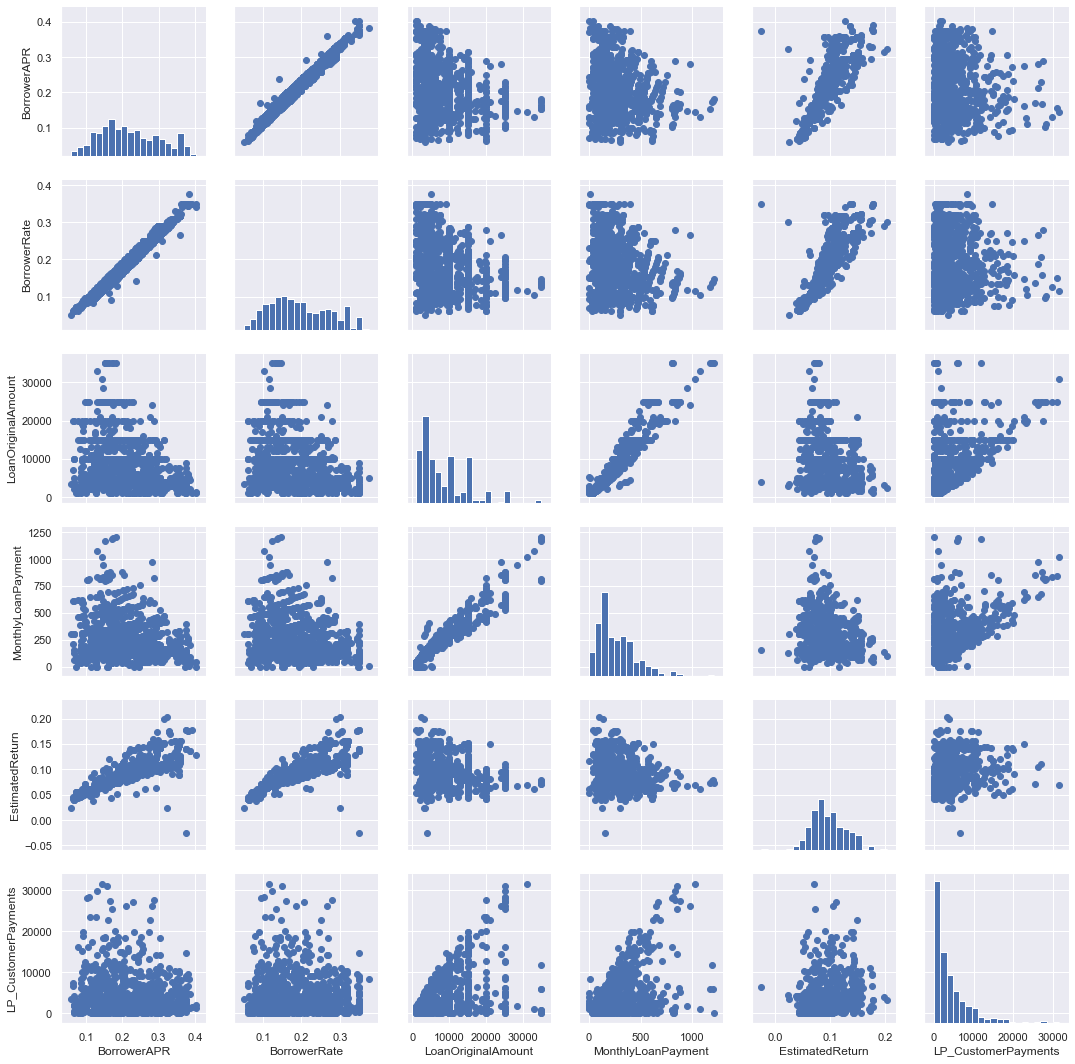

In [27]:
# plot matrix: sample 1000
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

#### Observations:
1. borrower APR and borrower rate have a strong positive correlation with estimated return
2. loan amount have a strong positive correlation with monthly loan payments
3. borrower APR and borrower rate have an extremely strong positive correlation with each other

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> While it is reasonable that employed people have a larger loan amount,not available, part-time, and retired people have the lowest loan amount

> More salary will lead to a higher probability of having loans. When peope have a house AND have more salary, the chance of having a loan is even higher.

> borrower APR, borrower rate and estimated return have strong correlations with each other while the loan amount people got is related to monthly loan payment.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Interestingly, people who belongs to "other" employment status have the highest loan amount while having a relatively low mean.

> Interestingly, when people don't have a house, the number of people have a loan is lower. However, when people don't have a house but they are EXTREMELY wealthy (25,000-49,999) or EXTREMELY poor (1-24999), there is a higher probability that they have a loan.

## Multivariate Exploration

#### 1. The relationship between, loan amount, investment from friends, and occupation

In [28]:
loan_income_employ = df[['MonthlyLoanPayment','StatedMonthlyIncome','EmploymentStatus']]
loan_income_employ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 3 columns):
MonthlyLoanPayment     113937 non-null float64
StatedMonthlyIncome    113937 non-null float64
EmploymentStatus       111682 non-null object
dtypes: float64(2), object(1)
memory usage: 2.6+ MB


In [29]:
# drop null value for the consistency of the graph and data
loan_income_employ = loan_income_employ.dropna()
loan_income_employ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111682 entries, 0 to 113936
Data columns (total 3 columns):
MonthlyLoanPayment     111682 non-null float64
StatedMonthlyIncome    111682 non-null float64
EmploymentStatus       111682 non-null object
dtypes: float64(2), object(1)
memory usage: 3.4+ MB


C:\Users\Jayden\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'The balance between loan payment and income per month')

<Figure size 2880x1440 with 0 Axes>

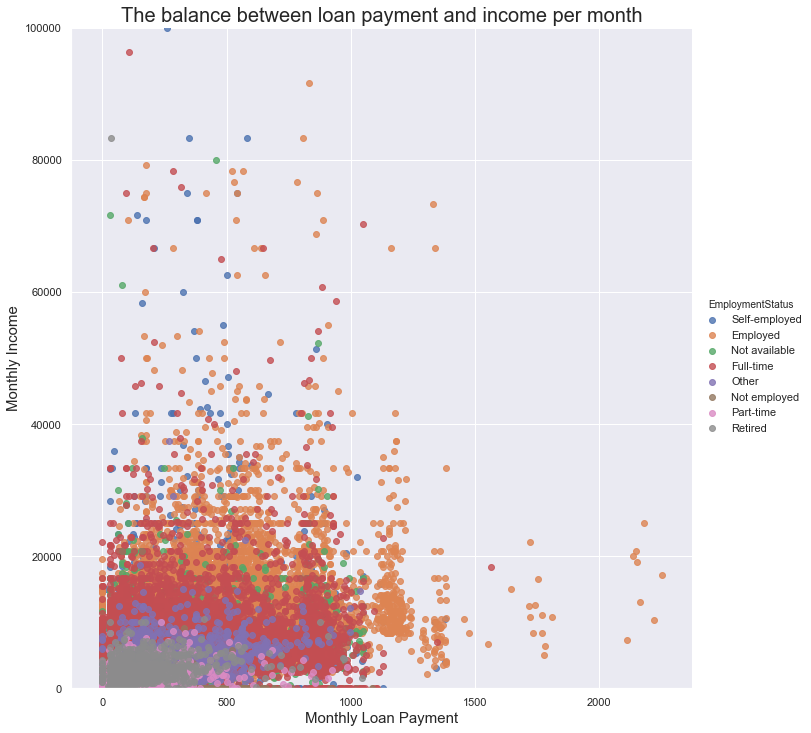

In [30]:
# plot 
plt.figure(figsize = (40,20))
g = sb.FacetGrid(data = loan_income_employ,hue='EmploymentStatus',size = 10)
g= g.map(sb.regplot,'MonthlyLoanPayment','StatedMonthlyIncome',x_jitter = 0.03,fit_reg=False)
g.add_legend()
plt.ylim(0,100000)
plt.xlabel('Monthly Loan Payment',size = 15)
plt.ylabel('Monthly Income',size = 15)
plt.title('The balance between loan payment and income per month',size =20)

### 2.  The relationship between employment status, APR and return

In [31]:
def hist_map(x,y, **kwargs):
    plt.hist2d(x,y,cmap='YlGnBu')

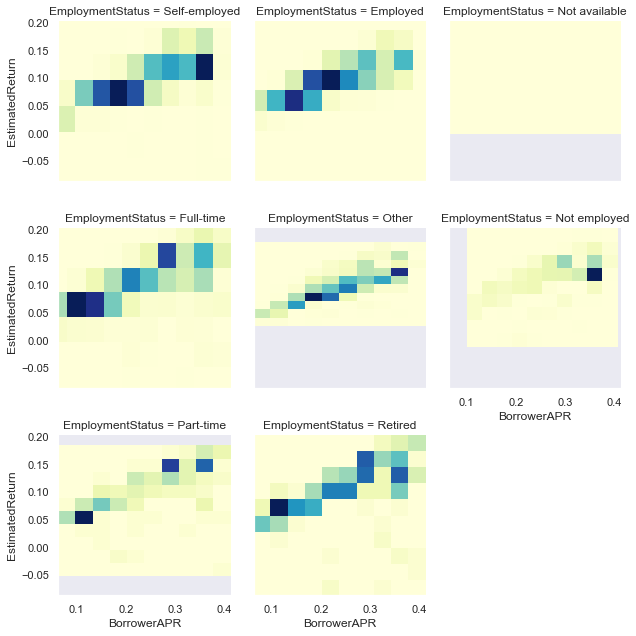

In [32]:
# understand how employment status affect estimated return and  APR
g = sb.FacetGrid(data = df, col = 'EmploymentStatus',size = 3,col_wrap = 3)
g.map(hist_map, 'BorrowerAPR', 'EstimatedReturn')

### 3.  The relationship between employment status, APR and income

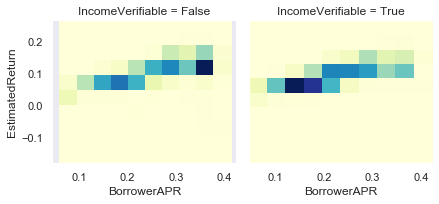

In [33]:
g = sb.FacetGrid(data = df, col = 'IncomeVerifiable',size = 3,col_wrap = 3)
g.map(hist_map, 'BorrowerAPR', 'EstimatedReturn')

### 4.  The relationship between employment status, APR and whether or not the person belongs to certain group


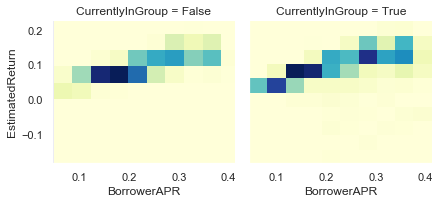

In [34]:
g = sb.FacetGrid(data = df, col = 'CurrentlyInGroup',size = 3,col_wrap = 3)
g.map(hist_map, 'BorrowerAPR', 'EstimatedReturn')

 ### 5.  The relationship between employment status, APR and duration of the loan

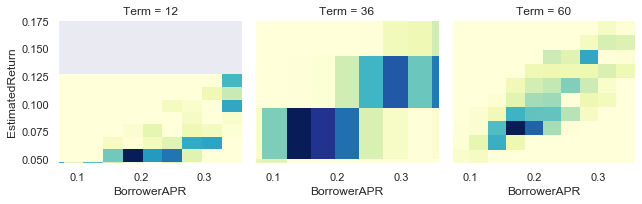

In [35]:
g = sb.FacetGrid(data = df, col = 'Term',size = 3,col_wrap = 3)
g.map(hist_map, 'BorrowerAPR', 'EstimatedReturn')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The monthly loan payment is proportional to the monthly income, as expected. Most full-time employees whose income from 0 to 20000 has less than 1000 dollars loan payment permonth.

### Were there any interesting or surprising interactions between features?

> Self employed people have less loan but have a much ihger monthly income,one person even has 1M monthly income with a loan less than500 dollars per month

> When people have a stable income source and can show the proof of the income, people tend to have less borrow APR while having the simialr estimated return. This situation makes sense because lender would take more risks by lending the loans to the people who have an unstable source of income. In order to offset the risks, this type of people should take more APR in general.

### Conclusion:
I conclude that there are many factors that can influence the loan amount and loan duration such as the geographic location, salary, occupation, and employment status.It it interesting to notice that self-employed tend to be much more wealthy while having less loan in the dataset. Most people have monthly income udner 40000 have less than 1500 dollars loan payment per omnth.A stable income source such as having a full-time job, proof of income source, belongs to certain group, and consistently pay monthly loan payment can show the the lenders that this person has a strong pay back ability now and in the future. Thus, resulting in a less APR with the similar return.